Describe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path_des = "/content/drive/MyDrive/capstone/ml code (celia iseng)/describe/Symptom2Disease.csv"
df_des = pd.read_csv(path_des)

In [ ]:
!pip install rake-nltk
import nltk
from rake_nltk import Rake
nltk.download('stopwords')
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#remove function
def keywords(text):
  key_arr = []
  r = Rake()
  r.extract_keywords_from_text(text)
  for rating, keyword in r.get_ranked_phrases_with_scores():
    key_arr.append(keyword)
  return key_arr

def sen(arr):
  s = " ".join([str(item) for item in arr])
  return s

In [ ]:
sentences_des = []
for i in df_des['text'].values.tolist():
  sentences_des.append(sen(keywords(i)))

In [ ]:
des_diseases = df_des['label']

Ceklis

In [ ]:
path_check = "/content/drive/MyDrive/capstone/ml code (celia iseng)/checklist/dataset.csv"
df_check = pd.read_csv(path_check)

In [ ]:
symptoms_check = df_check.drop(columns=['Disease'])

In [ ]:
import numpy as np
symptoms_check = symptoms_check.to_numpy()
sentences_check = []
for i in symptoms_check:
  #print(i)
  s = " ".join([str(item).replace("_", " ") for item in i if str(item) != "nan"])
  sentences_check = np.append(sentences_check,s)

In [ ]:
sentences_check = sentences_check.tolist()

In [ ]:
check_diseases = df_check['Disease']

In [ ]:
des_diseases = des_diseases.values.tolist()
check_diseases = check_diseases.values.tolist()

menggabungkan dataset

In [ ]:
sentences = sentences_check + sentences_des
diseases = check_diseases + des_diseases

In [ ]:
df = {'Diseases': diseases,'sentences': sentences}
df = pd.DataFrame(df)
print(df) 

              Diseases                                          sentences
0     Fungal infection  itching  skin rash  nodal skin eruptions  disc...
1     Fungal infection   skin rash  nodal skin eruptions  dischromic  ...
2     Fungal infection  itching  nodal skin eruptions  dischromic  pat...
3     Fungal infection            itching  skin rash  dischromic  patches
4     Fungal infection           itching  skin rash  nodal skin eruptions
...                ...                                                ...
6115          diabetes  occasionally get palpitations speeding heart t...
6116          diabetes  cuts take skin rashes skin bruises skin well p...
6117          diabetes  frequently feel drowsy also significantly lost...
6118          diabetes  urinary tract infections yeast infections trou...
6119          diabetes  usually gets better dry cough constantly sneez...

[6120 rows x 2 columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
def label_encode(labels):
    label_encoder.fit(labels)
    label_sequences = label_encoder.transform(labels)
    return label_sequences

df['label_encoded'] = label_encode(df['Diseases'])

In [ ]:
df = df.drop(df[df["label_encoded"]==43].index)
df = df.drop(df[df["label_encoded"]==44].index)
df = df.drop(df[df["label_encoded"]==45].index)
df = df.drop(df[df["label_encoded"]==48].index)
df = df.drop(df[df["label_encoded"]==49].index)

In [ ]:
print(len(df.Diseases.unique()))
print((df.Diseases.unique()))

45
['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo' 'Varicose Veins'
 'Dimorphic Hemorrhoids' 'Hypertension' 'gastroesophageal reflux disease']


In [ ]:
df.head()

,Diseases,sentences,label_encoded
0,Fungal infection,itching skin rash nodal skin eruptions disc...,16
1,Fungal infection,skin rash nodal skin eruptions dischromic ...,16
2,Fungal infection,itching nodal skin eruptions dischromic pat...,16
3,Fungal infection,itching skin rash dischromic patches,16
4,Fungal infection,itching skin rash nodal skin eruptions,16


In [ ]:
df.tail()

,Diseases,sentences,label_encoded
5965,gastroesophageal reflux disease,lean forward fatty foods eating spicy chest hu...,46
5966,gastroesophageal reflux disease,constantly get horrible acid reflux agony regu...,46
5967,gastroesophageal reflux disease,throat often feels like occasionally get feel ...,46
5968,gastroesophageal reflux disease,sour taste anything acidic throat stomach mout...,46
5969,gastroesophageal reflux disease,typical symptoms include heartburn throat ting...,46


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(df['sentences'].values.tolist(),df['label_encoded'].values.tolist(), test_size = 0.2, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, test_size = 0.25, random_state=1)

In [ ]:
vocab_size = 2000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
#training_portion = .8

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(x_train)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

validation_sequences = tokenizer.texts_to_sequences(x_val)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

test_sequences = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

In [ ]:
print(train_padded)

[[ 63   2  35 ...   0   0   0]
 [ 63   2  35 ...   0   0   0]
 [239 242  61 ...   0   0   0]
 ...
 [  6  39  24 ...   0   0   0]
 [  6  11  13 ...   0   0   0]
 [  6  11  35 ...   0   0   0]]


In [ ]:
print(validation_padded)

[[ 76  11  53 ...   0   0   0]
 [ 73   2 201 ...   0   0   0]
 [ 76 136  90 ...   0   0   0]
 ...
 [ 18   4  15 ...   0   0   0]
 [  6  71   5 ...   0   0   0]
 [ 16   6   8 ...   0   0   0]]


In [ ]:
def create_model(vocab_size, embedding_dim, max_length):
  model = models.Sequential([
  layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  layers.GlobalAveragePooling1D(),
  layers.Dense(24, activation='relu'),
  Dropout(0.1),
  layers.Dense(50, activation='softmax')
  ])

  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=optimizers.Adam(),
                metrics=['accuracy'])
  
  return model

In [ ]:
model = create_model(vocab_size, embedding_dim, max_length)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           32000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                1250      
                                                                 
Total params: 33,658
Trainable params: 33,658
Non-trainable params: 0
____________________________________________________

In [ ]:
train_labels = np.array(y_train)
validation_labels = np.array(y_val)
test_labels = np.array(y_test)
train_labels = train_labels.reshape(len(train_labels), 1)
validation_labels = validation_labels.reshape(len(validation_labels), 1)
test_labels = validation_labels.reshape(len(test_labels), 1)

In [ ]:
num_epochs = 100
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, 
                    validation_data=(validation_padded, validation_labels))

Epoch 1/100
111/111 [==============================] - 2s 5ms/step - loss: 3.8915 - accuracy: 0.0358 - val_loss: 3.8624 - val_accuracy: 0.0528
Epoch 2/100
111/111 [==============================] - 0s 4ms/step - loss: 3.8207 - accuracy: 0.0398 - val_loss: 3.7921 - val_accuracy: 0.0451
Epoch 3/100
111/111 [==============================] - 0s 4ms/step - loss: 3.7627 - accuracy: 0.0514 - val_loss: 3.7514 - val_accuracy: 0.0375
Epoch 4/100
111/111 [==============================] - 1s 7ms/step - loss: 3.7226 - accuracy: 0.0593 - val_loss: 3.7107 - val_accuracy: 0.0596
Epoch 5/100
111/111 [==============================] - 1s 10ms/step - loss: 3.6685 - accuracy: 0.0679 - val_loss: 3.6321 - val_accuracy: 0.0622
Epoch 6/100
111/111 [==============================] - 1s 10ms/step - loss: 3.5479 - accuracy: 0.0994 - val_loss: 3.4579 - val_accuracy: 0.0698
Epoch 7/100
111/111 [==============================] - 1s 10ms/step - loss: 3.3199 - accuracy: 0.1386 - val_loss: 3.1638 - val_accuracy: 0.1

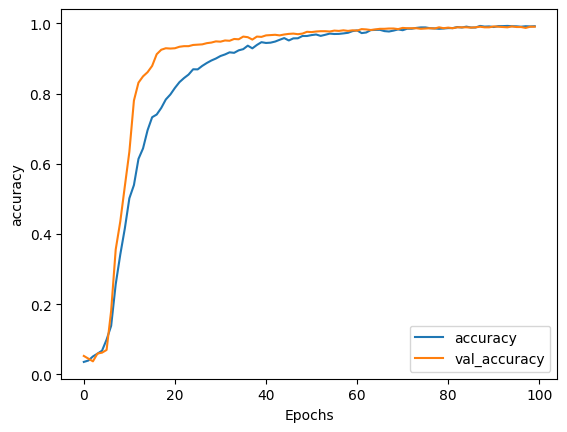

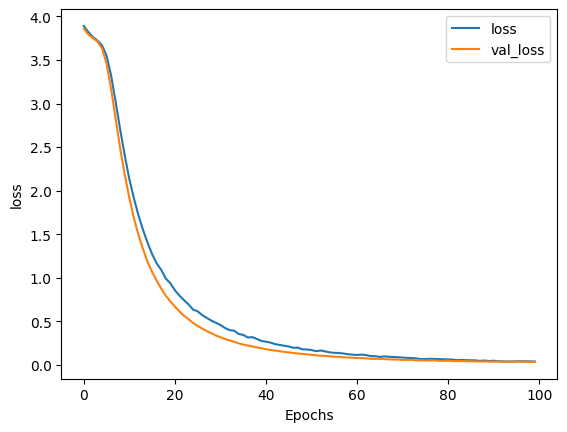

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
from sklearn.metrics import classification_report
pred = model.predict(test_padded, batch_size=32, verbose=1)
predicted = np.argmax(pred, axis=1)
report = classification_report(test_labels, predicted)
print(report)

37/37 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        20
           4       0.96      1.00      0.98        26
           5       1.00      1.00      1.00        34
           6       1.00      0.97      0.99        34
           7       1.00      0.97      0.99        34
           8       0.95      0.97      0.96        36
           9       1.00      1.00      1.00        20
          10       1.00      0.97      0.98        32
          11       0.97      0.97      0.97        34
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00        29
          15       1.00      1.00      1.00        22
          16       0.94     

In [ ]:
test1 = ["I have an itchy rash with red bumps resembling fluid-filled blisters that has spread all over my body. Along with the rash, I may have a fever, headache, sore throat, and reduced appetite."]

In [ ]:
testing = []
for i in test1:
  testing.append(sen(keywords(i)))

In [ ]:
testing

['red bumps resembling fluid sore throat reduced appetite filled blisters itchy rash rash spread may headache fever body along']

In [ ]:
test_sequences = tokenizer.texts_to_sequences(testing)
test_padded = pad_sequences(test_sequences, padding=padding_type, maxlen=max_length)

In [ ]:
prediction = model.predict_on_batch(
    test_padded
)

In [ ]:
print(prediction)

[[8.76520592e-19 6.33336138e-04 1.22723611e-06 4.68215408e-16
  1.29625907e-10 1.63538391e-10 3.03213201e-05 9.30697096e-21
  5.67852876e-05 9.10393519e-14 4.85556690e-12 1.45627146e-08
  3.25926542e-26 5.43617716e-14 1.10088066e-25 1.39916319e-05
  3.52682546e-02 1.75675477e-17 7.94349617e-08 5.95885226e-08
  6.72411639e-31 5.49763929e-16 4.36348281e-23 2.73027363e-24
  1.09028189e-10 1.20720568e-24 1.06437898e-19 1.38058360e-30
  4.07515698e-34 9.62362528e-01 1.65348213e-09 2.16620247e-05
  5.98119780e-14 2.75220629e-13 7.52684807e-12 3.78084972e-15
  1.99125694e-09 1.02227705e-03 6.63836231e-21 2.16043176e-07
  5.73949684e-16 5.89109026e-04 1.11347674e-07 4.70830358e-16
  2.37645972e-16 3.35734664e-16 9.61499547e-10 1.73790889e-20
  1.41897788e-17 3.11348294e-16]]


In [ ]:
for i in prediction:
  unsure=False
  print(np.max(i))
  if np.max(i)<0.55:
    unsure=True
    print("Can't be diagnosed")
  else:
    top_3 = np.argsort(i)[-1:][::-1]
    print(label_encoder.inverse_transform(top_3))
    print(top_3)

0.7412946
['Chicken pox']
[8]


In [87]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [89]:
import tensorflowjs as tfjs
filepath = "/content/drive/MyDrive/capstone/ml code (celia iseng)/Eksperimen~~/model experimen 4/model.h5"
model.save(filepath, save_format='h5')
tfjs.converters.save_keras_model(model, "/content/drive/MyDrive/capstone/ml code (celia iseng)/Eksperimen~~/model experimen 4/")

In [90]:
word_index = tokenizer.word_index
index_to_word = {index: word for word, index in word_index.items()}
dict_input = pd.DataFrame.from_dict(index_to_word, orient='index', columns=['Word'])
csv_filename = '/content/drive/MyDrive/capstone/ml code (celia iseng)/Eksperimen~~/model experimen 4/dict_input.csv'
dict_input.to_csv(csv_filename)
label_mapping = {label: encoded_label for label, encoded_label in zip(df['Diseases'].tolist(),df['label_encoded'].tolist())}
dict_output = pd.DataFrame.from_dict(label_mapping, orient='index', columns=['EncodedLabel'])
dict_output.index.name = 'OriginalLabel'
csv_filename = '/content/drive/MyDrive/capstone/ml code (celia iseng)/Eksperimen~~/model experimen 4/dict_output.csv'
dict_output.to_csv(csv_filename)